# Lab 2. Convolutional Neural Networks (CNN)

### Import packages

In [1]:
from cnn import CNN

In [2]:
import tensorflow as tf

### Global variables

In [3]:
training_dir = '../dataset/training'
validation_dir = '../dataset/validation'

cnn = CNN(base_model='ResNet50')

In [4]:
cnn.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(1024/2, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(15, activation='softmax'))

### Train



Reading training and validation data...
Found 2985 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


Model summary
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 15)                7695      
                                                                 
Total params: 24,644,495
Trainable params: 1

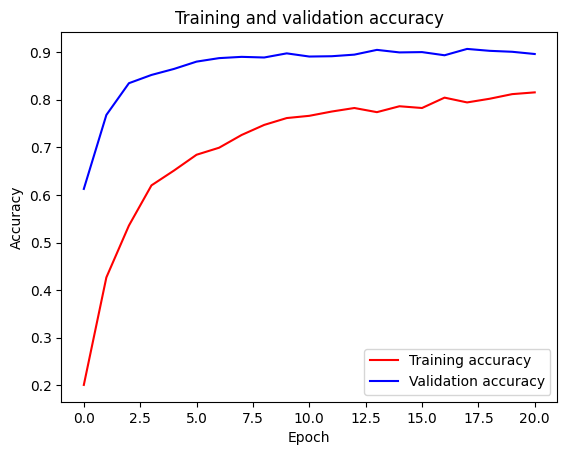

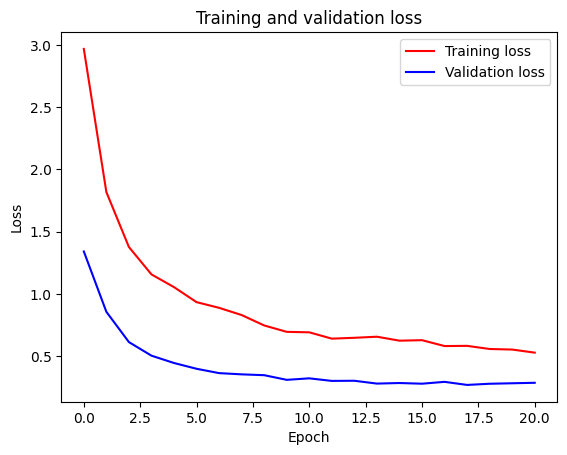

In [5]:
cnn.train(training_dir, validation_dir, epochs=50)
cnn.save('resnet50-2epoch')

N/N representa la particion de las imagenes entre la particion en lotes.

### Predict

#### Load model

In [4]:
cnn.load('resnet50-2epoch')

#### Training set

In [8]:
cnn.predict(training_dir, "Training")

Reading test data...
Found 2985 images belonging to 15 classes.
2985/2985 [==============================] - 44s 15ms/step


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom            107.0    0.0     0.0      0.0         0.0          0.0      0.0          9.0       0.0     0.0           0.0    0.0     0.0     0.0            0.0
Coast                0.0  238.0     1.0      1.0         0.0          0.0      0.0          0.0       3.0     0.0          17.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0   219.0      0.0         0.0          0.0      0.0          0.0       3.0     0.0           6.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0    153.0         0.0          1.0      0.0          0.0       0.0     0.0           3.0    0.0     3.0     0.0        

#### Validation set

In [9]:
cnn.predict(validation_dir, "Validation")

Reading test data...
Found 1500 images belonging to 15 classes.
1500/1500 [==============================] - 22s 15ms/step


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Bedroom  Coast  Forest  Highway  Industrial  Inside city  Kitchen  Living room  Mountain  Office  Open country  Store  Street  Suburb  Tall building
Bedroom             85.0    0.0     0.0      0.0         0.0          0.0      1.0         13.0       0.0     0.0           0.0    1.0     0.0     0.0            0.0
Coast                0.0   91.0     0.0      0.0         0.0          0.0      0.0          0.0       1.0     0.0           8.0    0.0     0.0     0.0            0.0
Forest               0.0    0.0    95.0      0.0         0.0          0.0      0.0          0.0       2.0     0.0           3.0    0.0     0.0     0.0            0.0
Highway              0.0    0.0     0.0     92.0         0.0          0.0      0.0          0.0       1.0     0.0           2.0    0.0     5.0     0.0      

si cogemos muchos lotes porvoca que ehay muchas oscilanciones. Si se utiliza todo va muy lento.

Una forma de aumentar el numero de ejemplos es hacer una generación modificando

train 0.91, val 0.88133

 train   val 0.91